In [2]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
import scipy as sc

The SEIR model is defined by the following set of coupled ordinary differential equations

\begin{align}
    \frac{dS}{dt}&=\Lambda-\mu S-\beta \frac{IS}{N}\\
    \frac{dE}{dt}&=\beta \frac{IS}{N}-(\mu+a)E\\
    \frac{dI}{dt}&=a E-(\gamma+\mu)I\\
    \frac{dR}{dt}&=\gamma I-\mu R
\end{align}

Where $S:susceptibles$, $E:Exposed$, $I:Infected$ and $R:Recovered$.
$a^{-1}: Incubation Period$, $\Lambda^{-1}=\mu^{-1}:Period\;of\;birth\;and\;death$, $\beta^{-1}:Time\;between\;infections$ y $\gamma:typical\;time\;of\;recovered$.

In [12]:
"""Methods for SIR model computational solution"""

def susceptible(Lambda,Mu,Beta,A,Gamma,s,e,i,t):
    """
    Differential equation of Susceptible.
    """
    return Lambda-Mu*s-Beta*s*i

def exposed(Lambda,Mu,Beta,A,Gamma,s,e,i,t):
    """
    Differential equation of Exposed.
    """
    return Beta*s*i-(Mu+A)*e

def infected(Lambda,Mu,Beta,A,Gamma,s,e,i,t):
    """
    Differential equation of Infected.
    """
    return A*e-(Gamma+Mu)*i

def RungeKutta4(f1,f2,f3,t0,s0,e0,i0,tF,Lambda,Mu,Beta,A,Gamma,dt):
    """
    RungeKutta method is used to solve the coupled equations of the SEIR model.
    """
    n=int((tF-t0)/dt)+1
    t=np.linspace(t0,tF,n)
    s=np.zeros([n])
    e=np.zeros([n])
    i=np.zeros([n])
    r=np.zeros([n])
    
    s[0]=s0
    e[0]=e0
    i[0]=i0
    r[0]=1-(s0+e0+i0)
    
    for j in range(1,n,1):
        ds1 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1],
            e[j-1],
            i[j-1],
            t[j-1],
        )
        de1 = dt*exposed(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1],
            e[j-1],
            i[j-1],
            t[j-1],
        )
        di1 = dt*infected(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1],
            e[j-1],
            i[j-1],
            t[j-1],
        )
    
        ds2 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1]+ds1/2.0,
            e[j-1]+de1/2.0,
            i[j-1]+di1/2.0,
            t[j-1]+dt/2.0,
        )
        de2 = dt*exposed(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1]+ds1/2.0,
            e[j-1]+de1/2.0,
            i[j-1]+di1/2.0,
            t[j-1]+dt/2.0,
        )
        di2 = dt*infected(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1]+ds1/2.0,
            e[j-1]+de1/2.0,
            i[j-1]+di1/2.0,
            t[j-1]+dt/2.0,
        )
    
        ds3 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1]+ds2/2.0,
            e[j-1]+de2/2.0,
            i[j-1]+di2/2.0,
            t[j-1]+dt/2.0,
        )
        de3 = dt*exposed(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1]+ds2/2.0,
            e[j-1]+de2/2.0,
            i[j-1]+di2/2.0,
            t[j-1]+dt/2.0,
        )
        di3 = dt*infected(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1]+ds2/2.0,
            e[j-1]+de2/2.0,
            i[j-1]+di2/2.0,
            t[j-1]+dt/2.0,
        )
    
        ds4 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1]+ds3,
            e[j-1]+de3,
            i[j-1]+di3,
            t[j-1]+dt,
        )
        de4 = dt*exposed(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1]+ds3,
            e[j-1]+de3,
            i[j-1]+di3,
            t[j-1]+dt,
        )
        di4 = dt*infected(
            Lambda,
            Mu,
            Beta,
            A,
            Gamma,
            s[j-1]+ds3,
            e[j-1]+de3,
            i[j-1]+di3,
            t[j-1]+dt,
        )
        
        s[j]=s[j-1]+(ds1+2.0*ds2+2.0*ds3+ds4)/6.0;
        e[j]=e[j-1]+(de1+2.0*de2+2.0*de3+de4)/6.0;
        i[j]=i[j-1]+(di1+2.0*di2+2.0*di3+di4)/6.0;
        r[j]=1-(s[j]+e[j]+i[j])
    
    return t,s,e,i,r

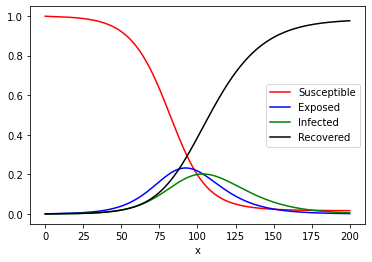

In [48]:
"""Model parameters beta=0.3, Mu=0, Gamma^-1=14, a^-1=14"""
T=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[0]
S=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[1]
E=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[2]
I=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[3]
R=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[4]

#Parameters
Lambda = 0
Mu=0
Beta=0.3
A=1/14
Gamma=1/14

#Initial Conditions
N=7*10**9
s0=0.999
e0=0
i0=0.001
dt=0.1

#Days
t0=0
tF=200

plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,E,label="Exposed",color="blue")
plt.plot(T,I,label="Infected",color="green")
plt.plot(T,R,label="Recovered",color="black")
plt.legend()
plt.xlabel("x")
plt.show()

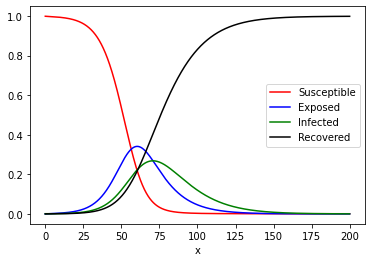

In [50]:
"""Model parameters beta=0.5, Mu=0, Gamma^-1=14, a^-1=14"""
T=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[0]
S=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[1]
E=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[2]
I=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[3]
R=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[4]

#Parameters
Lambda = 0
Mu=0
Beta=0.5
A=1/14
Gamma=1/14

#Initial Conditions
N=7*10**9
s0=0.999
e0=0
i0=0.001
dt=0.1

#Days
t0=0
tF=200

plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,E,label="Exposed",color="blue")
plt.plot(T,I,label="Infected",color="green")
plt.plot(T,R,label="Recovered",color="black")
plt.legend()
plt.xlabel("x")
plt.show()

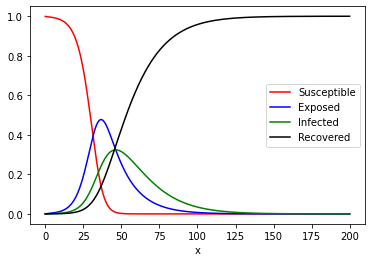

In [53]:
"""Model parameters beta=1, Mu=0, Gamma^-1=14, a^-1=14"""
T=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[0]
S=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[1]
E=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[2]
I=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[3]
R=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[4]

#Parameters
Lambda = 0
Mu=0
Beta=1
A=1/14
Gamma=1/14

#Initial Conditions
N=7*10**9
s0=0.999
e0=0
i0=0.001
dt=0.1

#Days
t0=0
tF=200

plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,E,label="Exposed",color="blue")
plt.plot(T,I,label="Infected",color="green")
plt.plot(T,R,label="Recovered",color="black")
plt.legend()
plt.xlabel("x")
plt.show()

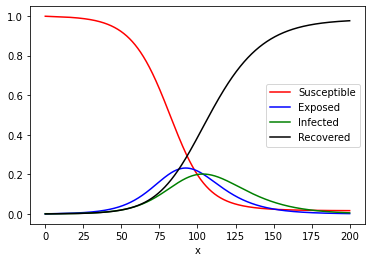

In [58]:
"""Model parameters beta=0.3, Mu=0.000008, Gamma^-1=14, a^-1=14"""
T=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[0]
S=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[1]
E=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[2]
I=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[3]
R=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[4]

#Parameters
Lambda = 0
Mu=0.000008
Beta=0.3
A=1/14
Gamma=1/14

#Initial Conditions
N=7*10**9
s0=0.999
e0=0
i0=0.001
dt=0.1

#Days
t0=0
tF=200

plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,E,label="Exposed",color="blue")
plt.plot(T,I,label="Infected",color="green")
plt.plot(T,R,label="Recovered",color="black")
plt.legend()
plt.xlabel("x")
plt.show()

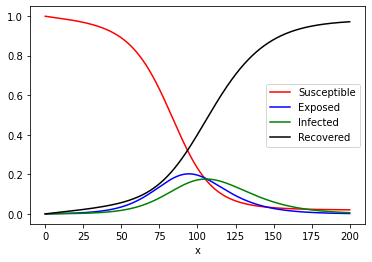

In [61]:
"""Model parameters beta=0.3, Mu=0.0008, Gamma^-1=14, a^-1=14"""
T=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[0]
S=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[1]
E=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[2]
I=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[3]
R=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[4]

#Parameters
Lambda = 0
Mu=0.0008
Beta=0.3
A=1/14
Gamma=1/14

#Initial Conditions
N=7*10**9
s0=0.999
e0=0
i0=0.001
dt=0.1

#Days
t0=0
tF=200

plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,E,label="Exposed",color="blue")
plt.plot(T,I,label="Infected",color="green")
plt.plot(T,R,label="Recovered",color="black")
plt.legend()
plt.xlabel("x")
plt.show()

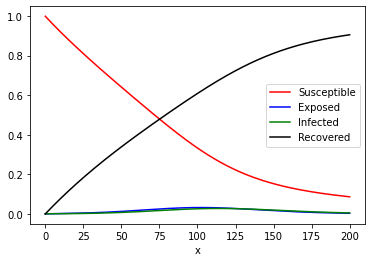

In [65]:
"""Model parameters beta=0.3, Mu=0.08, Gamma^-1=14, a^-1=14"""
T=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[0]
S=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[1]
E=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[2]
I=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[3]
R=RungeKutta4(
    susceptible,
    exposed,
    infected,
    t0,
    s0,
    e0,
    i0,
    tF,
    Lambda,
    Mu,
    Beta,
    A,
    Gamma,
    dt,
)[4]

#Parameters
Lambda = 0
Mu=0.008
Beta=0.3
A=1/14
Gamma=1/14

#Initial Conditions
N=7*10**9
s0=0.999
e0=0
i0=0.001
dt=0.1

#Days
t0=0
tF=200

plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,E,label="Exposed",color="blue")
plt.plot(T,I,label="Infected",color="green")
plt.plot(T,R,label="Recovered",color="black")
plt.legend()
plt.xlabel("x")
plt.show()